# EdA Project on Supermarket Sales dataset 

In [1]:
#importing required libraries and I set the style as darkgrid in seaborn
import pandas as pd                   #DataFrame
import numpy as np                    #Mathsops.
import matplotlib.pyplot as plt       #visualization
import seaborn as sns                 #visualization
import pingouin as pg                 #to calculate normality 
sns.set_theme(style="darkgrid")


In [2]:
df=pd.read_csv("supermarketsales.csv") #reads out our csv file and create a dataframe for it using pandas and store it as df
df                                     #view of our dataframe 

C:\Users\samee\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


# Part-1: Complete all the basic exploratory steps.

#### Column name in our dataset?

In [3]:
df.columns                   #returns all column name in the dataframe

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

#### Shape and Size of the dataset 

In [4]:
df.shape                    #shape returns total rows and columns

(1000, 17)

In [5]:
df.size                     #size returns total number of elements in it

17000

#### we check null values present in our dataset 

In [6]:
df.isnull().sum()           #using isnull() and sum() we can calculate total null entries of each feature
                            #inference:No null values are present

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

#### we want the Information of the dataframe df 

In [7]:
df.info()                    #inference:we can have datatypes of each column,range index and 'memory usage' of our dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

#### To know the statistical view of the dataset  

In [8]:
df.describe()                 #describe() will return the iqr,min,max,mean,count & std of all numerical columns 

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


#### Rename some column name for some specific operation and store it as data. 

In [9]:
df.rename(columns={'gross margin percentage':'gross_margin_perc','gross income':'gross_income'},inplace=True)
df.columns

                    #renamed two columns and storing it back to df and calling the columns to get the modified column name

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross_margin_perc', 'gross_income',
       'Rating'],
      dtype='object')

#### Correlation of numerical variables and heatmap

In [10]:
data=df[['Unit price','Quantity','Tax 5%','Total','cogs','gross_income','Rating']]
data.head()#top5 records of the operation above

                     #creating a variable which stores numerical columns only for calculating correlation values

,Unit price,Quantity,Tax 5%,Total,cogs,gross_income,Rating
0,74.69,7,26.1415,548.9715,522.83,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,30.2085,5.3


Text(0.5, 1.0, 'Multi-Collinearity of Supermarket Sales dataset')

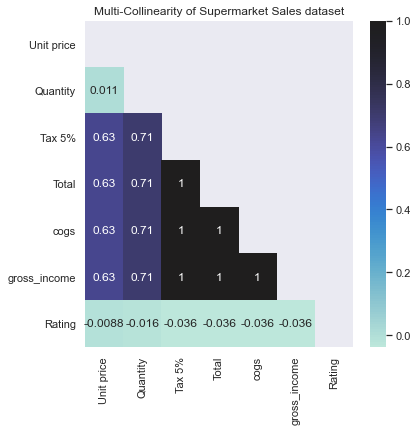

In [11]:
corr=data.corr()                                        #create a var corr defining corr() method for correlation
fig=plt.subplots(figsize=(6,6))                           #defined figure size for better view
mask=np.triu(np.ones_like(corr,dtype=bool))               #creating a mask which hides the lower triangular matrix
x=sns.heatmap(corr,annot=True,mask=mask,center=True)      #plot the heatmap by calling the corr variable defined above
x.set_title("Multi-Collinearity of Supermarket Sales dataset") #title for our heatmap

                #inference: We can see that the rating has no correlation with any other feature,so it won't impact our gross income in any ways.
                  Tax5% is higly correlated with total,cogs,gross income and the lowest corrleation is 63% with unit price column.

#### Check Outliers and distribution of data points using Boxplot

<AxesSubplot:>

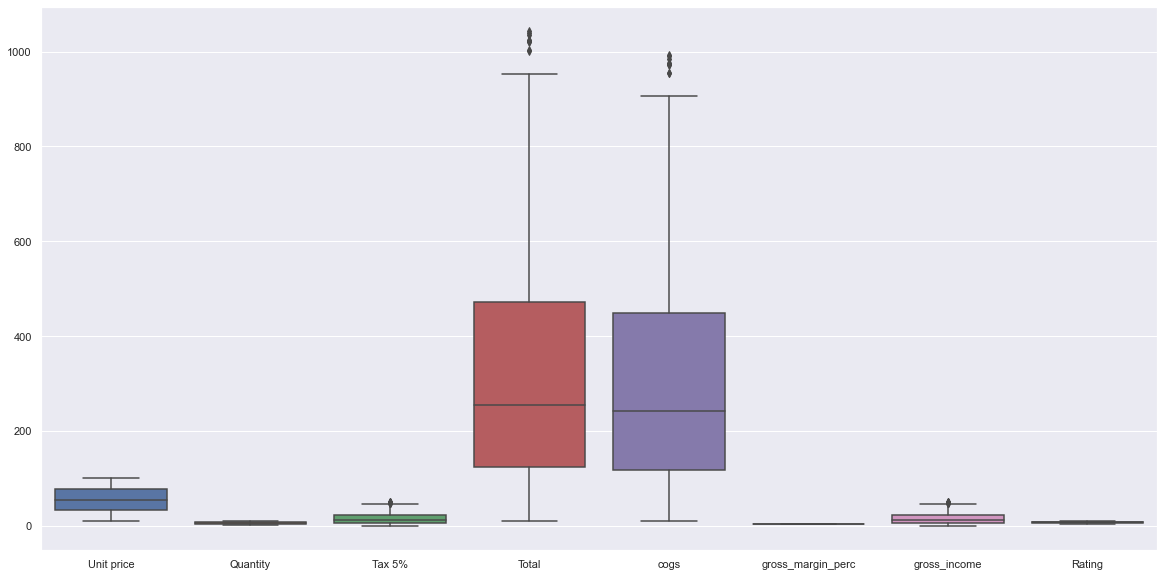

In [12]:
plt.figure(figsize=(20,10))         #define the figure size using matplotlib
sns.boxplot(data=df)                #plots the boxplot by parsing the data named dataframe variable created above

                         #inference:There are outliers present in Tax 5%,total,cogs and gross income column but they are very close to the whiskers so it is not an extreme outliers and we can proceed with these data points.

#### Visualization of our data feature and distributions of our numerical data type

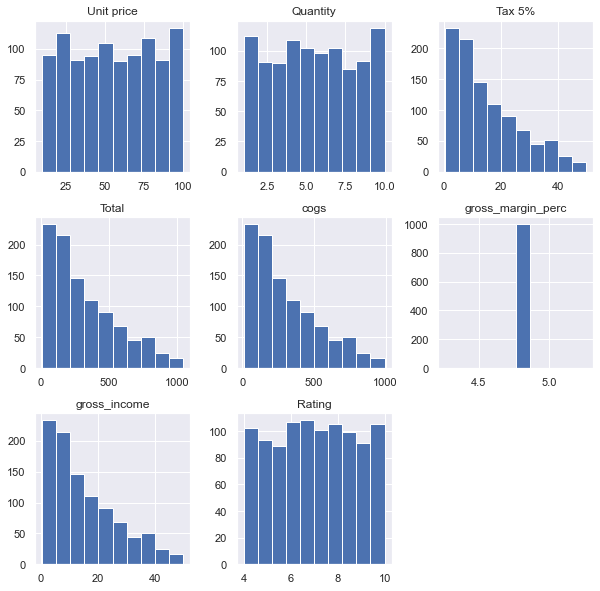

In [13]:
df.hist(figsize=(10,10))              #using dataframe I tried to plot the histogram of all numerical column at one go
plt.show()                            #plots the histogram

                           #inference: None of the column looks normally distributed and gross margin perc has same value so a constant graph or line is generated in this case, rest all columns are skewed.

# Part-2:

#### Is your supermarket more popular with males or females?  

Female    501
Male      499
Name: Gender, dtype: int64


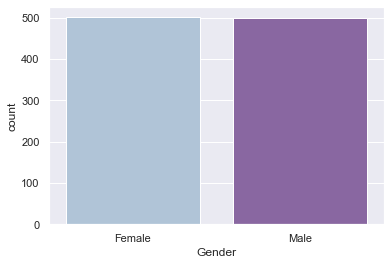

In [14]:
sns.countplot(x='Gender',data=df,palette='BuPu')   #countplot used to see the visit or count of male and female
print(df.Gender.value_counts())                    #prints the value count of each gender ,male and female

                           #inference:

                   #inference: My supermarket is popular among both female and male, though female has slightly more than male on count ,may be because females like shopping more than males.

#### What does the customer rating look like and can you also comment on its skewness? 

               W          pval  normal
Rating  0.958199  2.685838e-16   False

Median value of Rating: 7.0
Mean value of Rating: 6.972700000000003
Mode value of Rating: 0    6.0
dtype: float64


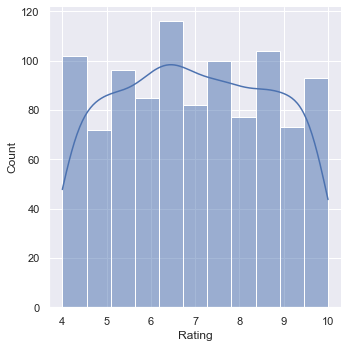

In [15]:
sns.displot(x='Rating',data=df,kde=True,kind='hist')
                     #this codeblock plots the histogram of rating column and 'kde' used for showing the line for distribution
print(pg.normality(df['Rating']))
                     #it will show the normality status and p value of rating column using pingouin library 
print('')            #prints empty line or space
print('Median value of Rating:',df.Rating.median()) 
print('Mean value of Rating:',df.Rating.mean())
print('Mode value of Rating:',df.Rating.mode())
                     #Mean,Median and Mode of the rating column is calculated and prints the value


                #inference:Though the customer Rating column looks like normally distributed but from the normality test and mean ,median,mode it is clear that it is skewed and not normally distributed.

#### What can you say about the aggregate sales across the branches?  

In [16]:
print(df['Branch'].value_counts())   #Prints the value count of each branch A,B & C
Br=df.groupby(by = 'Branch').sum()   #using groupby in branch and calculates the sum of every other columns with branch as index
Br

A    340
B    332
C    328
Name: Branch, dtype: int64


,Unit price,Quantity,Tax 5%,Total,cogs,gross_margin_perc,gross_income,Rating
Branch,,,,,,,,
A,18625.49,1859,5057.1605,106200.3705,101143.21,1619.047619,5057.1605,2389.2
B,18478.88,1820,5057.0320,106197.6720,101140.64,1580.952381,5057.0320,2263.6
C,18567.76,1831,5265.1765,110568.7065,105303.53,1561.904762,5265.1765,2319.9


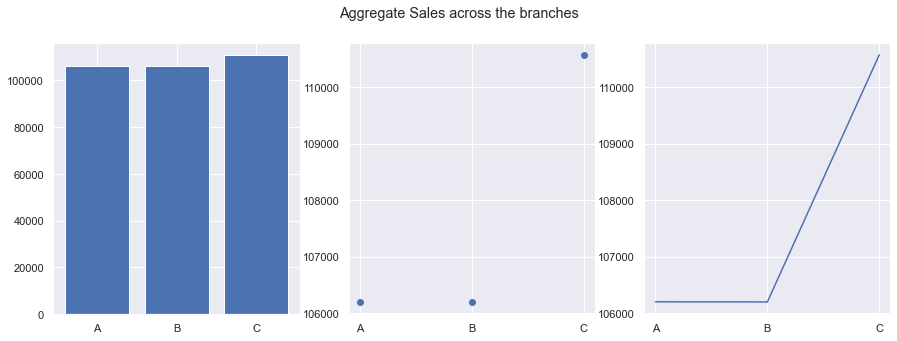

In [17]:
x=Br.index                   #declare x as the index of the Br dataframe created above
y=Br['Total']                #declare y as the Total column from the Br dataframe created above
plt.subplots(figsize=(15,5)) #defines the figure size 
plt.subplot(131)             #subplots used to plot three different plots in a row
plt.bar(x,y)                 #barplot using x and y as argument
plt.subplot(132)             #subplots used to plot three different plots in a row
plt.scatter(x,y)             #scatterplot using x and y argument
plt.subplot(133)             #subplots used to plot three different plots in a row
plt.plot(x,y)                #line plot using x and y as argument
plt.suptitle('Aggregate Sales across the branches')
                             #Suptitle is used here to name the title of these subplots
plt.show()                   #plots the subplots


                        #inference:

                 #inference:aggregate sales across the branch C is higher than A and B which is shown in all three subplots and branch A and B has the approx same sales total.

#### Which is the most popular payment method used by customers? 

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


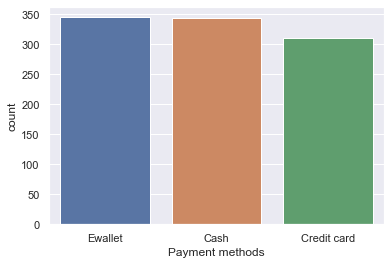

In [18]:
sns.countplot(x='Payment',data=df)  #countplot will plots the count of payment methods in Y axis and payment method in X axis
print(df.Payment.value_counts())    #prints the value count of each payment method
plt.xlabel("Payment methods")       #sets the xlabel of the plot
plt.show()                          #plots the graph

               #inference:From the countplot it is evident that Ewallet(345) is the most popular payment method and post that cash(344) is popular. Credit card is less popular payment method used by customers(311).

# Part-3:

#### Does gross income affect customer ratings? 

                Rating  gross_income
Rating        1.000000     -0.036442
gross_income -0.036442      1.000000


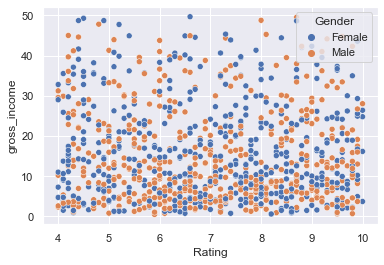

In [19]:
cor=df[['Rating','gross_income']]               #creates a variable cor which contains rating and gross income column
sns.scatterplot(x='Rating',y='gross_income',data=df,hue='Gender')
                                    #to show it effects or not ,I used scatterplot to see the relation between the two columns
    
print(cor.corr())                               #prints the correlation value of rating and gross income column

                  #inference: firstly the correlation value is approx to 0 so there is no such relation between thw gross income and customer ratings. Also from the scatterplot we can see that the data points or co ordinates distributed randomly here so we can say that there is no relation of the ratings vs gross income of supermarket.

#### Which is the most profitable branch? 

<AxesSubplot:xlabel='Branch', ylabel='gross_income'>

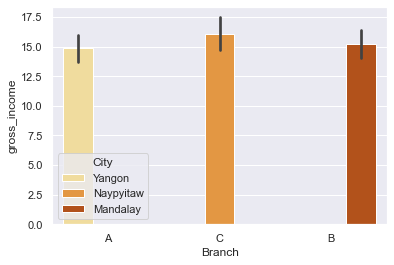

In [20]:
sns.barplot(x='Branch',y='gross_income',hue='City',data= df,palette='YlOrBr')
                   #plot to show the branch vs gross income using barplot

                #inference: Most profitable simply means highest gross income generated by a branch which is 'C' here as it clearly generates us more gross income although there is not much difference as C is slightly aove from A and B. Also Naypyitaw is the most profitable branch which generates highest gross income.

 #### How is the relationship between Gender and Gross income?

<AxesSubplot:xlabel='Gender', ylabel='gross_income'>

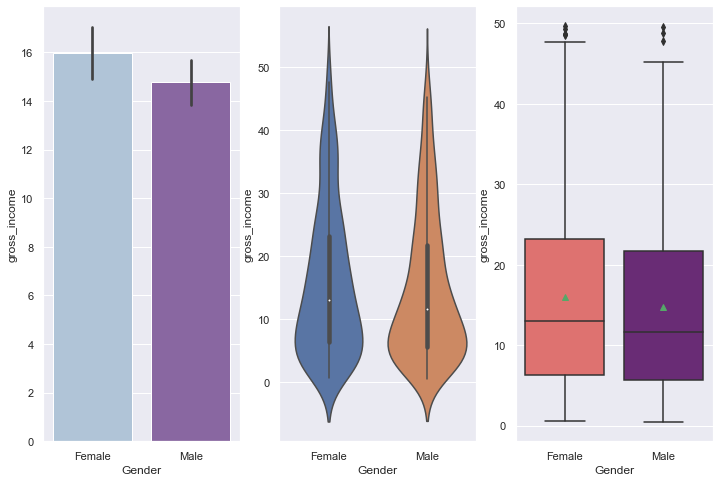

In [21]:
plt.figure(figsize=(12,8))             #defines the figure size of the plots

plt.subplot(131)                       #creating subplots (131)-one row ,three plots and this is the first plot in sequence
sns.barplot(x='Gender',y='gross_income',data= df,palette='BuPu')
                                       #plotting a barplot to see the relation between them
    
plt.subplot(132)                       #creating subplots (132)-one row, three plots and this is the second plot in sequence
sns.violinplot(x='Gender', y='gross_income', data = df)
                                       #creating violin plot to see the mode and other information
    
plt.subplot(133)                       #creating subplots (133)-one row ,three plots and this is the third plot in sequence
sns.boxplot(x='Gender', y='gross_income', data = df, showmeans = True,palette='magma_r')
                                       #plots the boxplot to see outliers and difference between the male and female

                  #inference: Mean and Median value is almost equal for both categories.
                            # min value is same for both genders, but max value differs a little where female spends a bit higher results in higher gross income of the supermarket. Gender-female helps generates higher gross income comparatively males.

#### Can you see any time trend in gross income?  

In [22]:
df['Date'] = pd.to_datetime(df['Date'])
                                #the date column which is an object initially now converted to datetime data type using pandas
df.set_index('Date',inplace=True)
                                #I've set the date column as my index to bind my values associated with each column
df.head()                       #top 5 modified dataframe as date index

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross_margin_perc,gross_income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [23]:
Datein=df.groupby(df.index).mean().index  
            #using groupby on the index column which is date and store it under Datein variable by calculating its mean of index
Datein      #calling the Datein variable or index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
               '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
               '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
      

<AxesSubplot:xlabel='Date', ylabel='gross_income'>

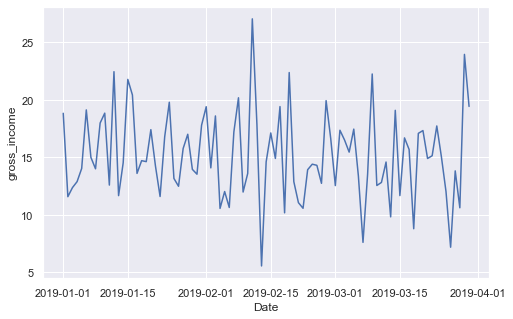

In [24]:
plt.figure(figsize=(8,5))     #defines the figure size of the trend graph
sns.lineplot(x=Datein, y=df.groupby(df.index).mean()['gross_income'])
                              #lineplot is used to show the time trend of gross income using mean values 

                #inference: No particular time trend except on the date between 2019-02-01 and 2019-02-15 where the peak gets very high and falls to lowest abruptly, rest all the trend is on a average scale and fluctuates within 10-20 limits of the gross income on y axis.

 #### Which product line helps you generate the most income?

In [25]:
df['Product line'].unique()          #unique types of product line in the dataset

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [26]:
Pl= df.groupby('Product line').sum()
              #groupby on product line column and sum function used to return total of each column according to the product line
Pl            #the above dataframe stored under Pl and we are calling the Pl function.

,Unit price,Quantity,Tax 5%,Total,cogs,gross_margin_perc,gross_income,Rating
Product line,,,,,,,,
Electronic accessories,9103.77,971,2587.5015,54337.5315,51750.03,809.523810,2587.5015,1177.2
Fashion accessories,10173.35,902,2585.9950,54305.8950,51719.90,847.619048,2585.9950,1251.2
Food and beverages,9745.54,952,2673.5640,56144.8440,53471.28,828.571429,2673.5640,1237.7
Health and beauty,8337.88,854,2342.5590,49193.7390,46851.18,723.809524,2342.5590,1064.5
Home and lifestyle,8850.71,911,2564.8530,53861.9130,51297.06,761.904762,2564.8530,1094.0
Sports and travel,9460.88,920,2624.8965,55122.8265,52497.93,790.476190,2624.8965,1148.1


<AxesSubplot:xlabel='Product line', ylabel='gross_income'>

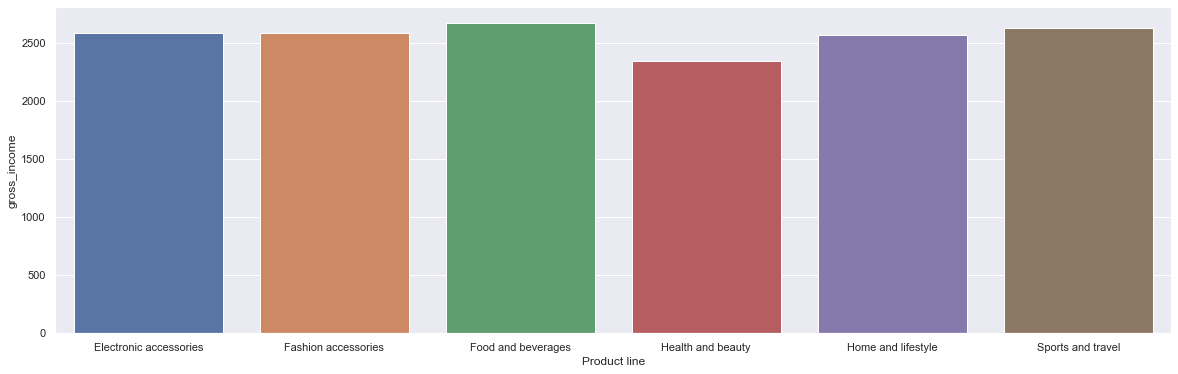

In [27]:
plt.figure(figsize=(20,6))  #defines the figure size of the plot
sns.barplot(x = Pl.index, y = 'gross_income', data = Pl)
                            #barplot used with the index column of Pl as x and total gross income against each product line as y

               #inference: The green coloured bar 'Food and beverages' has the highest gross income comparatibly other product line. So in order to increase my income I will be focused more on foods and beverages and increase the supply of this product line in order to generate the most income. 'Health and beauty' on the other hand generates lowest gross income so we need not be bothered of the supply of this product line.

#### What is the spending pattern of both males and females, meaning in which category do they spend more? 

<AxesSubplot:title={'center':'Total Monthly transaction by Gender'}, xlabel='Product line', ylabel='count'>

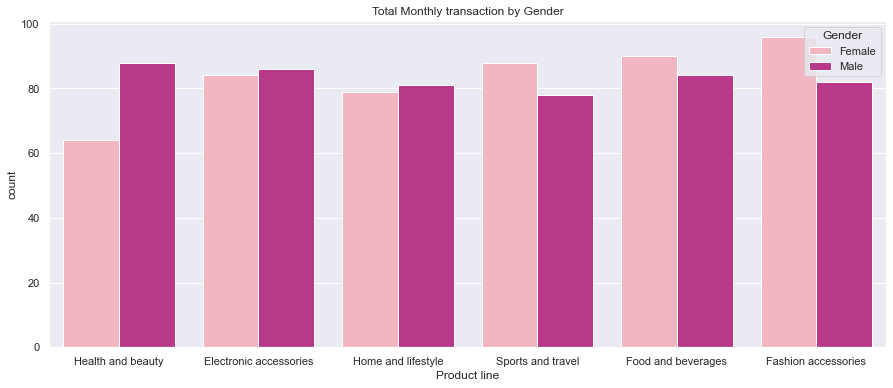

In [28]:
plt.figure(figsize=(15, 6))             #defines figure size of the plot
plt.title('Total Monthly transaction by Gender')
                                        #set the title as mentioned in the head section of the plot
sns.countplot(x='Product line',data=df, hue = df.Gender,palette='RdPu')
                                        #countplot used to find the pattern of spending against each product line of the two male and female

                 #inference:from countplot female spend more on 'fashion accessories' and least spend on 'Health and beauty' whereas male has a higher spend on 'Health and beauty' and least spend on 'Sports and travel' because female loves cosmetics and male gets a upper hand on health.

#### How many products are bought by customers? 

10    119
1     112
4     109
5     102
7     102
6      98
9      92
2      91
3      90
8      85
Name: Quantity, dtype: int64


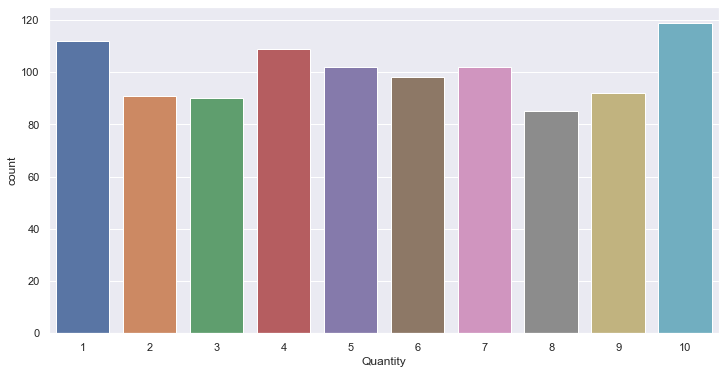

In [29]:
plt.figure(figsize=(12, 6))          #defines the figure size of the plots
sns.countplot(x='Quantity',data=df)  #countplot counts the no of customers bought the number of quantities of products
print(df['Quantity'].value_counts()) #calculates the count of quantity of products bought by customers

                 #inference:Products bought by customers can be understood by this countplot as the quantities bought the maximum number of times is 119 i.e exactly 119 customers buy 10 quantity of goods from the supermarket and 85 customers buy 8 quantities is the lowest purchase from the supermarket.

#### Which day of the week has maximum sales? 

In [30]:
df.head()                     #our dataframe after date set as index

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross_margin_perc,gross_income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [31]:
df.reset_index(inplace=True)  #Date column is not there so we reset the index of the dataframe and store it again as df
df.head()                     #calls out our dataframe head with top 5 rows

,Date,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross_margin_perc,gross_income,Rating
0,2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2,2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [32]:
df['daynumber'] = df['Date'].dt.weekday  
             #Returns the day number of the week using the date column and weekday function and creates a column daynumber in df
df['weekday'] = df['Date'].dt.day_name()
df['month']=df['Date'].dt.month
             #Returns the weekday name using date column and day_name() functionality and creates a column weekday in dataframe

In [33]:
df.head()    #modified dataframe after adding the two columns

,Date,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross_margin_perc,gross_income,Rating,daynumber,weekday,month
0,2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,Saturday,1
1,2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,4,Friday,3
2,2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,6,Sunday,3
3,2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,6,Sunday,1
4,2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,4,Friday,2


In [34]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross_margin_perc,gross_income,Rating,daynumber,month
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,-0.007040,-0.027387
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815,0.054770,-0.014524
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,0.038809,-0.022301
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,0.038809,-0.022301
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,0.038809,-0.022301
gross_margin_perc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross_income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,0.038809,-0.022301
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,-0.013879,-0.042880
daynumber,-0.007040,0.054770,0.038809,0.038809,0.038809,NaN,0.038809,-0.013879,1.000000,0.035357
month,-0.027387,-0.014524,-0.022301,-0.022301,-0.022301,NaN,-0.022301,-0.042880,0.035357,1.000000


In [35]:
df['month'].unique()

array([1, 3, 2], dtype=int64)

In [36]:
df.groupby('Gender').mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross_margin_perc,gross_income,Rating,daynumber,month
Gender,,,,,,,,,,
Female,55.263952,5.726547,15.956936,335.095659,319.138723,4.761905,15.956936,6.964471,2.996008,1.970060
Male,56.081944,5.292585,14.799487,310.789226,295.989739,4.761905,14.799487,6.980962,3.068136,2.016032


C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

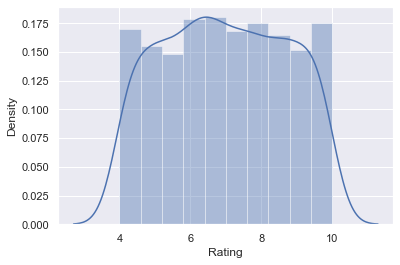

In [37]:
sns.distplot(df['Rating'])

(array([102.,  93.,  89., 107., 108., 101., 105.,  99.,  91., 105.]),
 array([ 4. ,  4.6,  5.2,  5.8,  6.4,  7. ,  7.6,  8.2,  8.8,  9.4, 10. ]),
 <BarContainer object of 10 artists>)

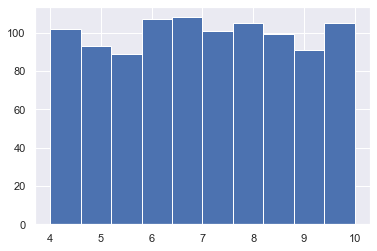

In [38]:
plt.hist(df['Rating'])

<AxesSubplot:xlabel='Total', ylabel='City'>

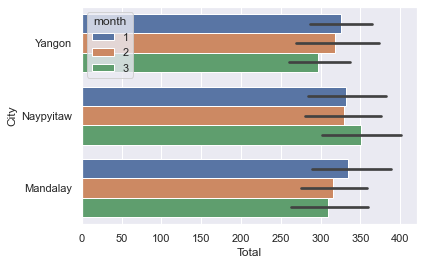

In [39]:
sns.barplot(x='Total',y='City',hue='month',data=df)

In [40]:
df.groupby('Customer type').sum()

,Unit price,Quantity,Tax 5%,Total,cogs,gross_margin_perc,gross_income,Rating,daynumber,month
Customer type,,,,,,,,,,
Member,28159.70,2785,7820.164,164223.444,156403.28,2385.714286,7820.164,3477.1,1496,996
Normal,27512.43,2725,7559.205,158743.305,151184.10,2376.190476,7559.205,3495.6,1536,997


In [41]:
164223/(164223+158743)

0.5084838651746624

<AxesSubplot:xlabel='weekday', ylabel='count'>

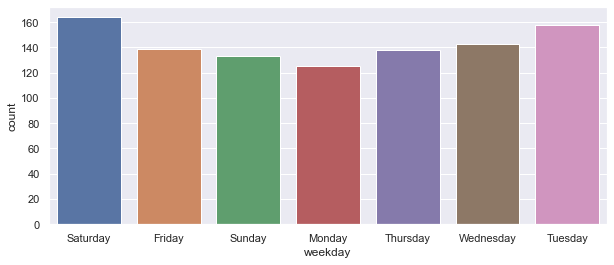

In [42]:
plt.figure(figsize=(10,4))          #defines the figure size of the plot
sns.countplot(x='weekday',data=df)  #used countplot to find the count of visitors in respective days

                #inference: Here day of week is categorical value and from the above plot it can be inferred that saturday the count is higher means more customers visit on Saturday and each customer buys some quantity and thus sales is maximum on saturday. Tuesday is the second most day where sales is high comparatibly from other days except saturday, and Monday is the day of the week which has minimum number of sales :one reason could be that it is the starting day of the week and usually customers planned on weekends to buy.  

#### Which hour of the day is busiest? 

In [43]:
df['Time'] = pd.to_datetime(df['Time']) 
                    #our time column initially is an object so to convert in datetime datatype is required to perform operations
df.head()           #dataframe

,Date,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross_margin_perc,gross_income,Rating,daynumber,weekday,month
0,2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2021-11-30 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,Saturday,1
1,2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2021-11-30 10:29:00,Cash,76.40,4.761905,3.8200,9.6,4,Friday,3
2,2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2021-11-30 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,6,Sunday,3
3,2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2021-11-30 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,6,Sunday,1
4,2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2021-11-30 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,4,Friday,2


In [44]:
df['hour']=df['Time'].dt.hour
df['minute']=df['Time'].dt.minute
                            #Now I want to extract the hour part from the time column and store it under a new column named hour
df.head()                   #dataframe with hour column in the last

,Date,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,...,Payment,cogs,gross_margin_perc,gross_income,Rating,daynumber,weekday,month,hour,minute
0,2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,...,Ewallet,522.83,4.761905,26.1415,9.1,5,Saturday,1,13,8
1,2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,...,Cash,76.40,4.761905,3.8200,9.6,4,Friday,3,10,29
2,2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,...,Credit card,324.31,4.761905,16.2155,7.4,6,Sunday,3,13,23
3,2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,...,Ewallet,465.76,4.761905,23.2880,8.4,6,Sunday,1,20,33
4,2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,...,Ewallet,604.17,4.761905,30.2085,5.3,4,Friday,2,10,37


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1000 non-null   datetime64[ns]
 1   Invoice ID         1000 non-null   object        
 2   Branch             1000 non-null   object        
 3   City               1000 non-null   object        
 4   Customer type      1000 non-null   object        
 5   Gender             1000 non-null   object        
 6   Product line       1000 non-null   object        
 7   Unit price         1000 non-null   float64       
 8   Quantity           1000 non-null   int64         
 9   Tax 5%             1000 non-null   float64       
 10  Total              1000 non-null   float64       
 11  Time               1000 non-null   datetime64[ns]
 12  Payment            1000 non-null   object        
 13  cogs               1000 non-null   float64       
 14  gross_mar

In [46]:
r=df[df['Gender']=='Female']
r

,Date,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,...,Payment,cogs,gross_margin_perc,gross_income,Rating,daynumber,weekday,month,hour,minute
0,2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,...,Ewallet,522.83,4.761905,26.1415,9.1,5,Saturday,1,13,8
1,2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,...,Cash,76.40,4.761905,3.8200,9.6,4,Friday,3,10,29
6,2019-02-25,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,...,Ewallet,413.04,4.761905,20.6520,5.8,0,Monday,2,14,36
7,2019-02-24,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,...,Ewallet,735.60,4.761905,36.7800,8.0,6,Sunday,2,11,38
8,2019-01-10,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,...,Credit card,72.52,4.761905,3.6260,7.2,3,Thursday,1,17,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,2019-03-22,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,...,Credit card,282.80,4.761905,14.1400,4.5,4,Friday,3,19,6
991,2019-01-24,602-16-6955,B,Mandalay,Normal,Female,Sports and travel,76.60,10,38.3000,...,Ewallet,766.00,4.761905,38.3000,6.0,3,Thursday,1,18,10
994,2019-02-18,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,...,Ewallet,60.95,4.761905,3.0475,5.9,0,Monday,2,11,40
996,2019-03-02,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,...,Ewallet,973.80,4.761905,48.6900,4.4,5,Saturday,3,17,16


<AxesSubplot:xlabel='hour', ylabel='Quantity'>

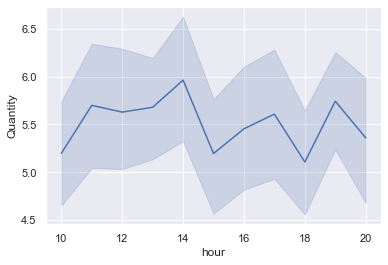

In [47]:
sns.lineplot(x='hour',y='Quantity',data=df) 
                       #busiest hour of day= no of sales in an hour so we plot the lineplot using hour and sales(Quantity)

                #inference: we know that quantity sold by a supermarket in an hour is the sales per hour or busiest hour, more the quantities sold more the busier the hour of the day is, We can clearly see in the trend or lineplot that peak value is at hour 14 means 2pm(evening) in 12 hr format is the busiest of all day. We should focus at 2pm to increase the sales.

##### Which product line should your supermarket focus on?  

<AxesSubplot:xlabel='Product line', ylabel='Rating'>

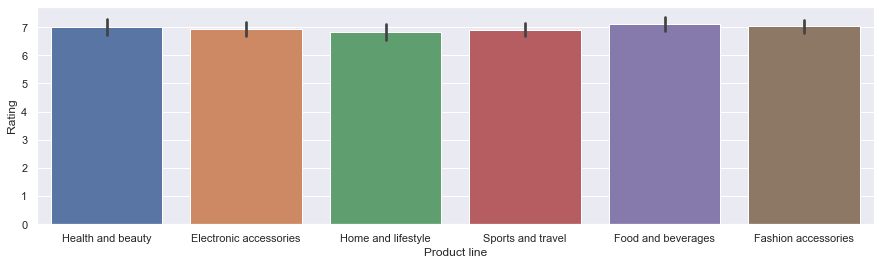

In [48]:
plt.figure(figsize=(15,4))      #defines the figure size of the plot
sns.barplot(x='Product line',y='Rating',data=df) #countplot used to plot the visitors count in a particular hour

                #inference: Rating is a factor to decide where we need to focus on which product line but here almost every product line has the approx same rating =7 and Food & beverages has only bit high rating 7+ ,Here we can't conclude anything as they are very close.

<AxesSubplot:xlabel='Product line', ylabel='Quantity'>

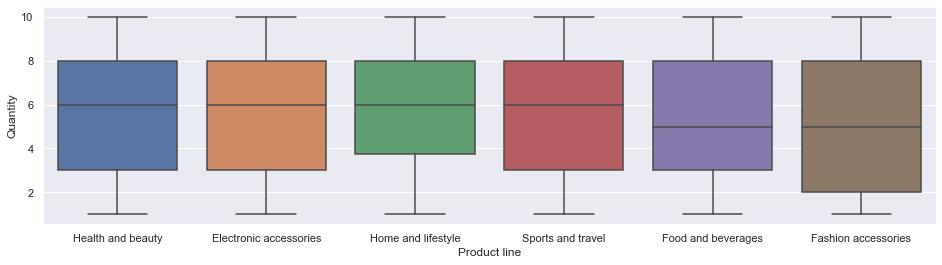

In [49]:
plt.figure(figsize=(16,4))           #defines the figure size of the plot
sns.boxplot(x = 'Product line', y = 'Quantity', data = df )
                                     #using boxplot here to plot and see the difference in product line with respect to quantity

                #inference:We already have seen that the ratings of each productline which is nearly 7 so to conclude,here in the boxplot quantity in y axis of two product line are lower from others ,they are 'Food and beverages' and 'Fashion accessories' where it can be seen that the supply is not enough ,so we need to focus on these two productlines and increase the quantity of these products line to maximise our gross income.

#### Which city should be chosen for expansion and what products should be focussed on?

In [50]:
df.City.unique()                      #unique city in our dataset using unique() from city column 

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [51]:
location= df.groupby('City').mean()   
                  #we need to calculate average of total of a product line using groupby in city column and store it as location
location          #prints the dataframe with the average of each column value by grouping in city

,Unit price,Quantity,Tax 5%,Total,cogs,gross_margin_perc,gross_income,Rating,daynumber,month,hour,minute
City,,,,,,,,,,,,
Mandalay,55.659277,5.481928,15.232024,319.872506,304.640482,4.761905,15.232024,6.818072,3.009036,2.003012,15.147590,31.403614
Naypyitaw,56.609024,5.582317,16.052367,337.099715,321.047348,4.761905,16.052367,7.072866,3.036585,1.951220,14.920732,30.243902
Yangon,54.780853,5.467647,14.874001,312.354031,297.480029,4.761905,14.874001,7.027059,3.050000,2.023529,14.667647,28.682353


<AxesSubplot:xlabel='City', ylabel='gross_income'>

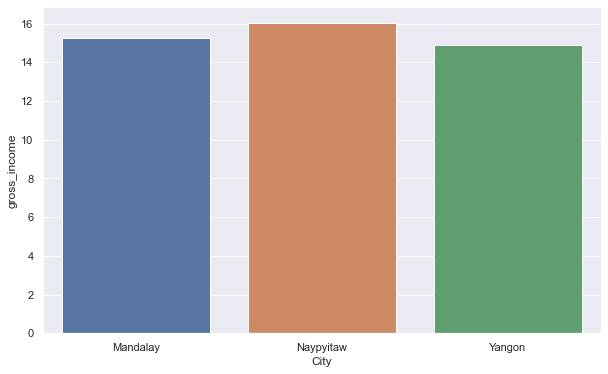

In [52]:
plt.figure(figsize=(10, 6))        #defines figure size in plots
sns.barplot(x = location.index, y = 'gross_income', data = location)
                                   #using barplot to see the average total of each city fetching from the location dataframe

                  #inference:It is clear from the barplot that our city named 'Naypyitaw' has the highest gross income touched to average 16,hence this city should be chosen for expansion of the bsuiness as this will increase our profit.

<AxesSubplot:xlabel='count', ylabel='Product line'>

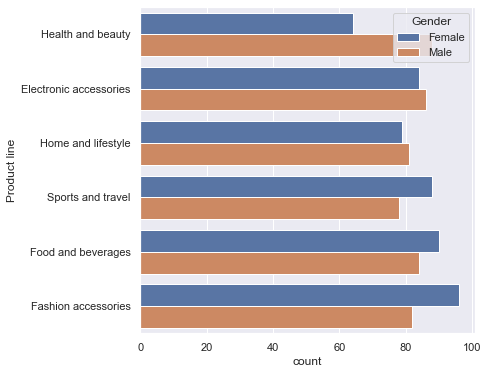

In [53]:
plt.figure(figsize=(6,6))            #defines the figure size of the plots
sns.countplot(y ='Product line', hue = "Gender", data = df)
                                     #countplot used to see the count of product line famous in respective city

<AxesSubplot:xlabel='Total', ylabel='Branch'>

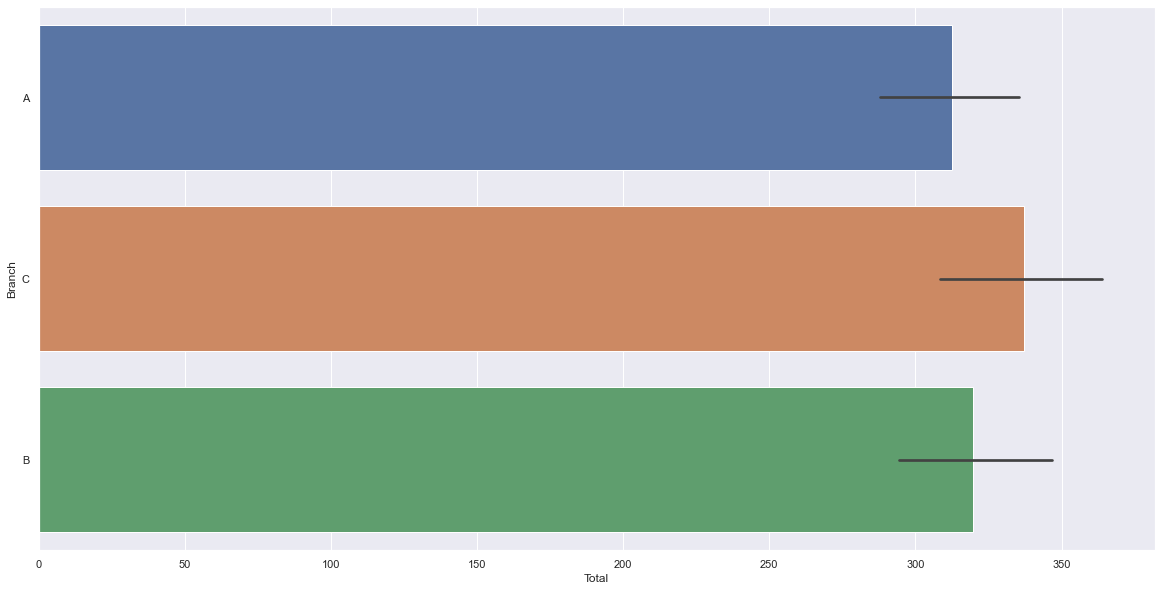

In [54]:
plt.figure(figsize=(20,10))
sns.barplot(x ='Total',y='Branch', data = df)

In [55]:
location= df.groupby('Branch').sum()   
                  #we need to calculate average of total of a product line using groupby in city column and store it as location
location   

,Unit price,Quantity,Tax 5%,Total,cogs,gross_margin_perc,gross_income,Rating,daynumber,month,hour,minute
Branch,,,,,,,,,,,,
A,18625.49,1859,5057.1605,106200.3705,101143.21,1619.047619,5057.1605,2389.2,1037,688,4987,9752
B,18478.88,1820,5057.0320,106197.6720,101140.64,1580.952381,5057.0320,2263.6,999,665,5029,10426
C,18567.76,1831,5265.1765,110568.7065,105303.53,1561.904762,5265.1765,2319.9,996,640,4894,9920


In [56]:
110568/(110568+106200+106197)

0.34235288653569274

<AxesSubplot:xlabel='count', ylabel='Gender'>

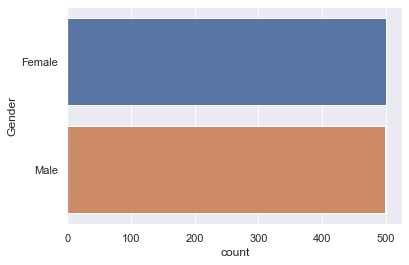

In [57]:
sns.countplot(y ='Gender', data = df)

In [58]:
df

,Date,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,...,Payment,cogs,gross_margin_perc,gross_income,Rating,daynumber,weekday,month,hour,minute
0,2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,...,Ewallet,522.83,4.761905,26.1415,9.1,5,Saturday,1,13,8
1,2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,...,Cash,76.40,4.761905,3.8200,9.6,4,Friday,3,10,29
2,2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,...,Credit card,324.31,4.761905,16.2155,7.4,6,Sunday,3,13,23
3,2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,...,Ewallet,465.76,4.761905,23.2880,8.4,6,Sunday,1,20,33
4,2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,...,Ewallet,604.17,4.761905,30.2085,5.3,4,Friday,2,10,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019-01-29,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,...,Ewallet,40.35,4.761905,2.0175,6.2,1,Tuesday,1,13,46
996,2019-03-02,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,...,Ewallet,973.80,4.761905,48.6900,4.4,5,Saturday,3,17,16
997,2019-02-09,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,...,Cash,31.84,4.761905,1.5920,7.7,5,Saturday,2,13,22
998,2019-02-22,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,...,Cash,65.82,4.761905,3.2910,4.1,4,Friday,2,15,33


                  #inference:Now we already have our city for expansion i.e 'Naypyitaw' because of higher average gross income from there ,in this countplot graph in the yaxis graph 'Food and beverages' is most demanded and customers buy this product is maximum in this city ,so to increase our gross income we need to focus on this product line from the 'Naypyitaw' city. we also had to look up for 'Fashion accessories' as our second most demanded product fro this city.